## 04 | Hierarchical Clustering

This notebook contains code for performing agglomerative hierarchical clustering on the Latent Dimensions obtained from the popVAE Variational Autoencoder.

**** AgAdapt Project ****

- Import required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

- Load Latent Dimension data into a Pandas DataFrame.

In [2]:
ld_df = pd.read_csv("../Data/C__Processed_Data/Offspring_Genotype_Data/04__popVAE_Offspring_Data/Offspring_Latent_Dimensions.txt", delimiter = '\t')

# Discard <sd> and <sampleID> columns.
ld_df.drop(["sd1", "sd2", "sampleID"], axis = 1, inplace = True)
# Rename <mean> columns to <LD>.
ld_df.rename(columns = {"mean1" : "LD1", "mean2" : "LD2"}, inplace = True)

ld_df

,LD1,LD2
0,7.305439,2.402194
1,-31.135525,-8.106439
2,-22.392998,-4.188796
3,-4.794639,-6.064219
4,-2.890736,1.747539
...,...,...
2144,4.093797,1.138109
2145,13.153651,14.301002
2146,-6.007522,-1.336077
2147,4.035870,1.111222


- Create a dendrogram based on Euclidean distance between individuals.
- This allows determination of the number of clusters and shows related data in a graphical form.

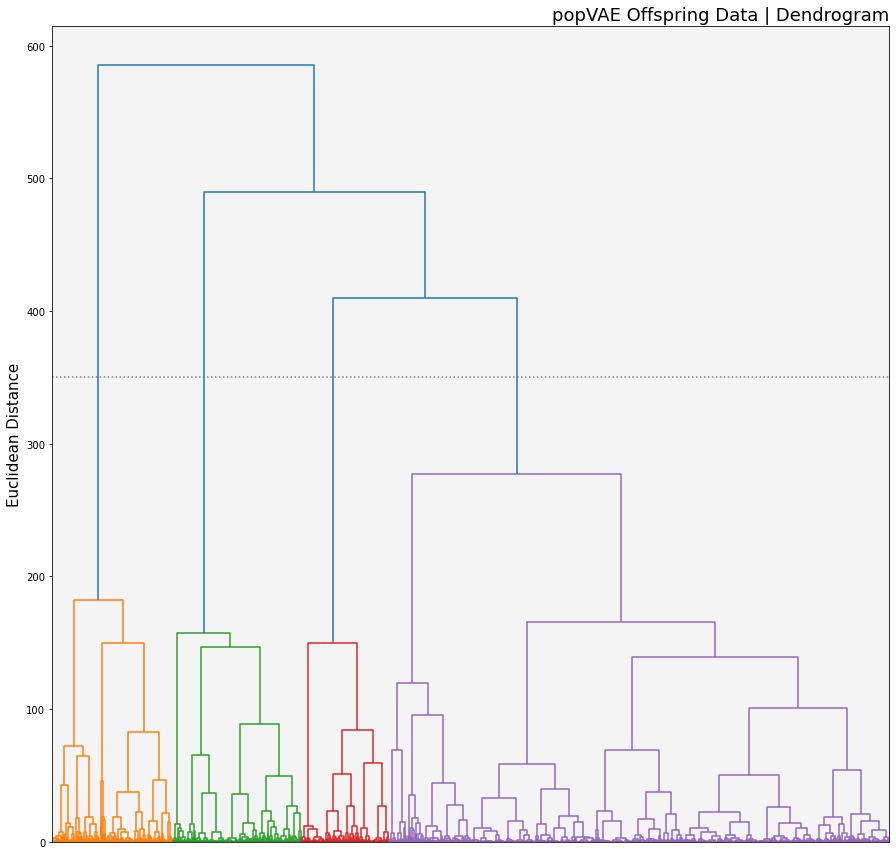

In [3]:
figure = plt.figure(figsize = (15, 15))
dendrogram_plot = figure.add_subplot(1, 1, 1)

# Create plot and axis titles.
dendrogram_plot.set_xlabel("Individuals", fontsize = 15)
dendrogram_plot.set_ylabel("Euclidean Distance", fontsize = 15)
dendrogram_plot.set_title("popVAE Offspring Data | Dendrogram", loc = "right", fontsize = 18)
dendrogram_plot.set_facecolor("#F4F4F4")

# Disable individual labels.
dendrogram_plot.axes.xaxis.set_visible(False)

dendrogram_plot.axhline(y = 350, c = "#7B7D7D", linestyle = ':')

# Create dendrogram.
dendrogram_plot = dendrogram(linkage(ld_df, method = "ward"))

- Save the plot to a file.

In [4]:
figure.savefig("../Results/Plots/popVAE_Hierarchical_Clustering/Dendrogram.png", facecolor = "w", dpi = 600)

- Based on the dendrogram, we can select a threshold of ~350, which would result in 4 clusters of data.
- Perform Agglomerative Hierarchical Clustering.

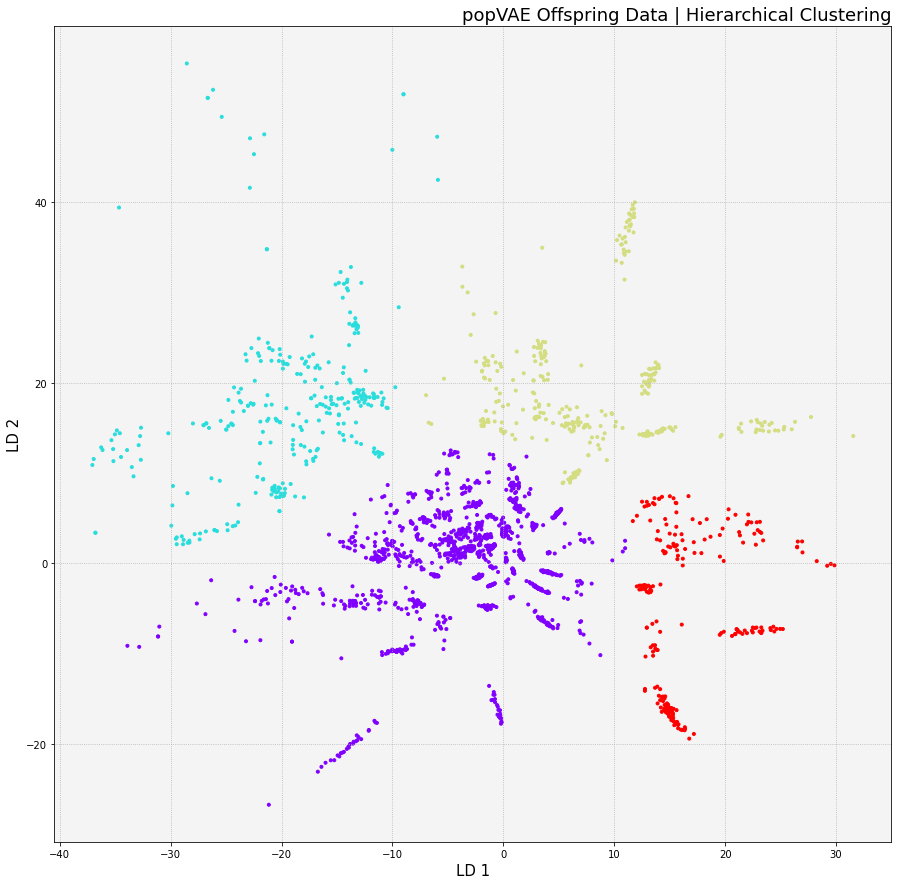

In [5]:
# Convert Latent Dimension DataFrame into array.
ld_array = ld_df.to_numpy()

# Perform clustering.
ld_cluster = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
ld_cluster.fit_predict(ld_array)

figure = plt.figure(figsize = (15, 15))

cluster_plot = figure.add_subplot(1, 1, 1)
cluster_plot.set_xlabel("LD 1", fontsize = 15)
cluster_plot.set_ylabel("LD 2", fontsize = 15)
cluster_plot.set_title("popVAE Offspring Data | Hierarchical Clustering", loc = "right", fontsize = 18)
cluster_plot.set_facecolor("#F4F4F4")
cluster_plot.grid(True, linestyle = ":")

cluster_plot = plt.scatter(ld_array[:, 0], ld_array[:, 1], marker = ".", c = ld_cluster.labels_, cmap = "rainbow")

- Save the plot to a file.

In [6]:
figure.savefig("../Results/Plots/popVAE_Hierarchical_Clustering/Hierarchical_Clustering.png", facecolor = "w", dpi = 600)